In [1]:
from hossam import load_data
from pandas import DataFrame, get_dummies, merge
from sklearn.preprocessing import OneHotEncoder

In [2]:
origin = load_data('nursing_grades')
origin

[data] https://data.hossam.kr/data/lab05/nursing_grades.xlsx
[desc] 어느 간호학과 대학원에 지원한 학생들에 대한 합격/불합격 여부를 조사한 가상의 데이터(메타데이터 없음)
[!] Cannot read metadata


,이름,성별,필기점수,학부성적,병원경력,합격여부
접수코드,,,,,,
NRS0001,장은우,남,380,3.61,3,불합격
NRS0002,최지호,남,660,3.67,3,합격
NRS0003,김하준,남,800,4.00,1,합격
NRS0004,임아윤,여,640,3.19,4,합격
NRS0005,강하준,남,520,2.93,4,불합격
...,...,...,...,...,...,...
NRS0396,박지유,여,620,4.00,2,불합격
NRS0397,조하은,여,560,3.04,3,불합격
NRS0398,박하윤,여,460,2.63,2,불합격


## #01. 준비작업
범주형 타입 변환 -> category

In [3]:
df = origin.astype({'성별': 'category', '병원경력' : 'category',
                    '합격여부': 'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, NRS0001 to NRS0400
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   이름      400 non-null    object  
 1   성별      400 non-null    category
 2   필기점수    400 non-null    int64   
 3   학부성적    400 non-null    float64 
 4   병원경력    400 non-null    category
 5   합격여부    400 non-null    category
dtypes: category(3), float64(1), int64(1), object(1)
memory usage: 14.1+ KB


## 일반 통계 모형에서 Pandas 사용 방법

- 모든 필드를 더미 변수로 변환(N개 생성) , get_dummies(데이터프레임, 컬럼=[''], 데이터타입)

In [4]:
df1 = get_dummies(df, columns=['성별'], dtype='int')
df1.head()

,이름,필기점수,학부성적,병원경력,합격여부,성별_남,성별_여
접수코드,,,,,,,
NRS0001,장은우,380,3.61,3,불합격,1,0
NRS0002,최지호,660,3.67,3,합격,1,0
NRS0003,김하준,800,4.00,1,합격,1,0
NRS0004,임아윤,640,3.19,4,합격,0,1
NRS0005,강하준,520,2.93,4,불합격,1,0


- N-1개의 더미 변수 생성
    - drop_first = True 파라미터를 설정한다 (기본값 = False)
    - 남,여 구분할 때 두 컬럼 모두 존재할 필요가 없기 때문에 하나만 써도 되서 사용하는듯

In [9]:
df2 = get_dummies(df, columns=['성별'], dtype='int',
                  drop_first=True)
df2.head()

,이름,필기점수,학부성적,병원경력,합격여부,성별_여
접수코드,,,,,,
NRS0001,장은우,380,3.61,3,불합격,0
NRS0002,최지호,660,3.67,3,합격,0
NRS0003,김하준,800,4.00,1,합격,0
NRS0004,임아윤,640,3.19,4,합격,1
NRS0005,강하준,520,2.93,4,불합격,0


- 두 개 이상의 명목형 변수도 처리 가능
    - 나머지 3 컬럼에 모두 0인 경우 드랍된 컬럼이 1이라는 것을 우리는 알 수 있음.

In [10]:
df3 = get_dummies(df, columns=['성별', '병원경력'], dtype='int',
                  drop_first=True)
df3.head()

,이름,필기점수,학부성적,합격여부,성별_여,병원경력_2,병원경력_3,병원경력_4
접수코드,,,,,,,,
NRS0001,장은우,380,3.61,불합격,0,0,1,0
NRS0002,최지호,660,3.67,합격,0,0,1,0
NRS0003,김하준,800,4.00,합격,0,0,0,0
NRS0004,임아윤,640,3.19,합격,1,0,0,1
NRS0005,강하준,520,2.93,불합격,0,0,0,1


## #02. Scikit-Learn을 사용하는 방법 (트리 기반 머신러닝 모형에 추천)

Sklearn의 OneHotEncoder는 2차원 배열이나 DataFrame 객체를 파라미터로 요구

-> 인코딩 처리할 명목형 변수의 차원 변환을 수행하거나 테이터프레임의 형태를 유지한 상태로 입력값을 생성해야함.

In [11]:
X = df['성별'].values.reshape(-1,1)
X

[['남'], ['남'], ['남'], ['여'], ['남'], ..., ['여'], ['여'], ['여'], ['여'], ['여']]
Length: 400
Categories (2, object): ['남', '여']

In [12]:
# 데이터 프레임 형태를 유지하면서 열을 추출하는 경우 (filter함수와 동일)
X = df[['성별']]
X.head()

,성별
접수코드,
NRS0001,남
NRS0002,남
NRS0003,남
NRS0004,여
NRS0005,남


OneHotEncoder(희소행렬 여부 지정, 첫 번째 항목 삭제 여부)

OneHotEncoder(sparse_output=False, drop = None)

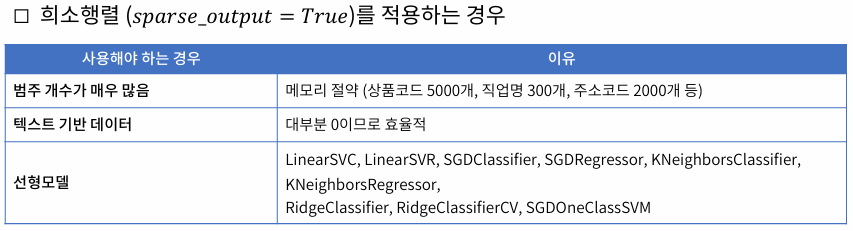

Dense 행렬(일반 배열) (sparse_output=False)를 적용하는 경우

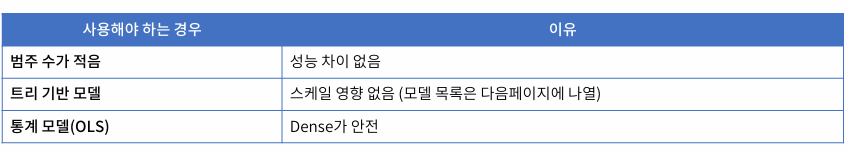

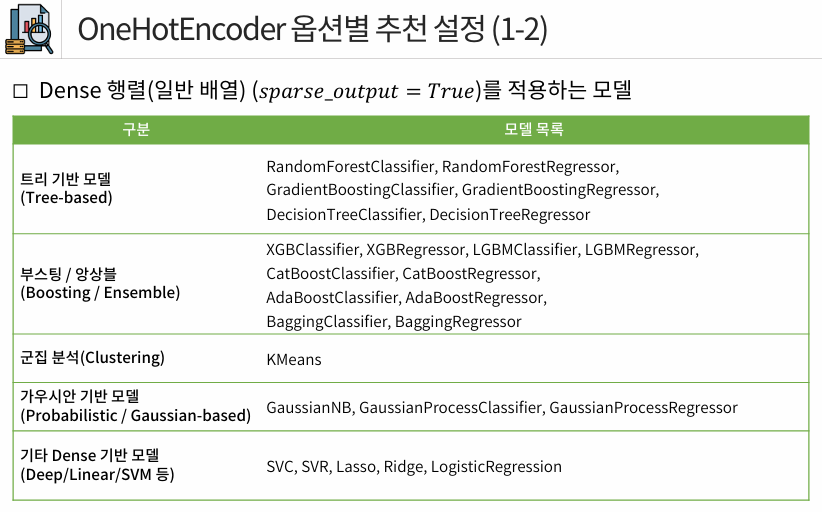

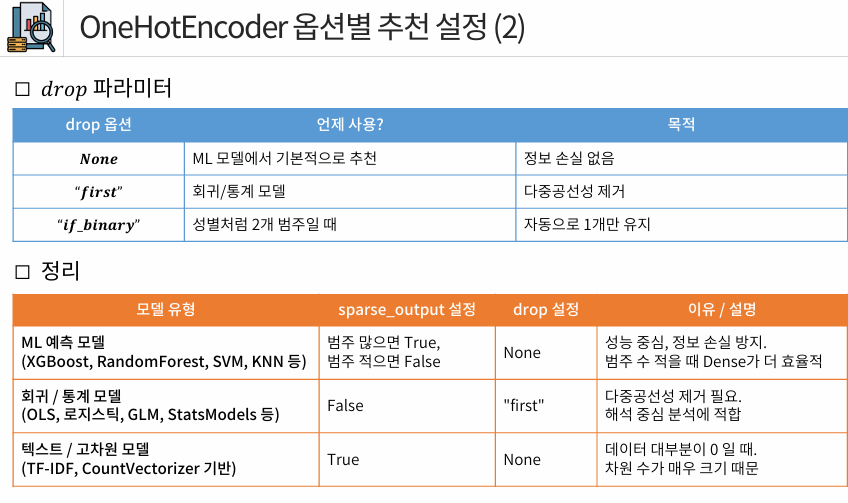

In [13]:
# OneHotEncoding 처리
encoder = OneHotEncoder(sparse_output=False, drop=None)
result = encoder.fit_transform(X)
result

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In [14]:
# 3단계 - 인코딩 결과를 데이터 프레임으로 생성
new_cols = encoder.get_feature_names_out(['성별'])
new_cols

array(['성별_남', '성별_여'], dtype=object)

In [16]:
#DataFrame 병합
one_hot_df = DataFrame(result, columns=new_cols, index=df.index)
one_hot_df.head()

,성별_남,성별_여
접수코드,,
NRS0001,1.0,0.0
NRS0002,1.0,0.0
NRS0003,1.0,0.0
NRS0004,0.0,1.0
NRS0005,1.0,0.0


In [18]:
# 원본 데이터 프레임과 병합
df_copy = df.copy()
df4 = merge(df_copy, one_hot_df, left_index=True, right_index=True)
df4.head()

,이름,성별,필기점수,학부성적,병원경력,합격여부,성별_남,성별_여
접수코드,,,,,,,,
NRS0001,장은우,남,380,3.61,3,불합격,1.0,0.0
NRS0002,최지호,남,660,3.67,3,합격,1.0,0.0
NRS0003,김하준,남,800,4.00,1,합격,1.0,0.0
NRS0004,임아윤,여,640,3.19,4,합격,0.0,1.0
NRS0005,강하준,남,520,2.93,4,불합격,1.0,0.0


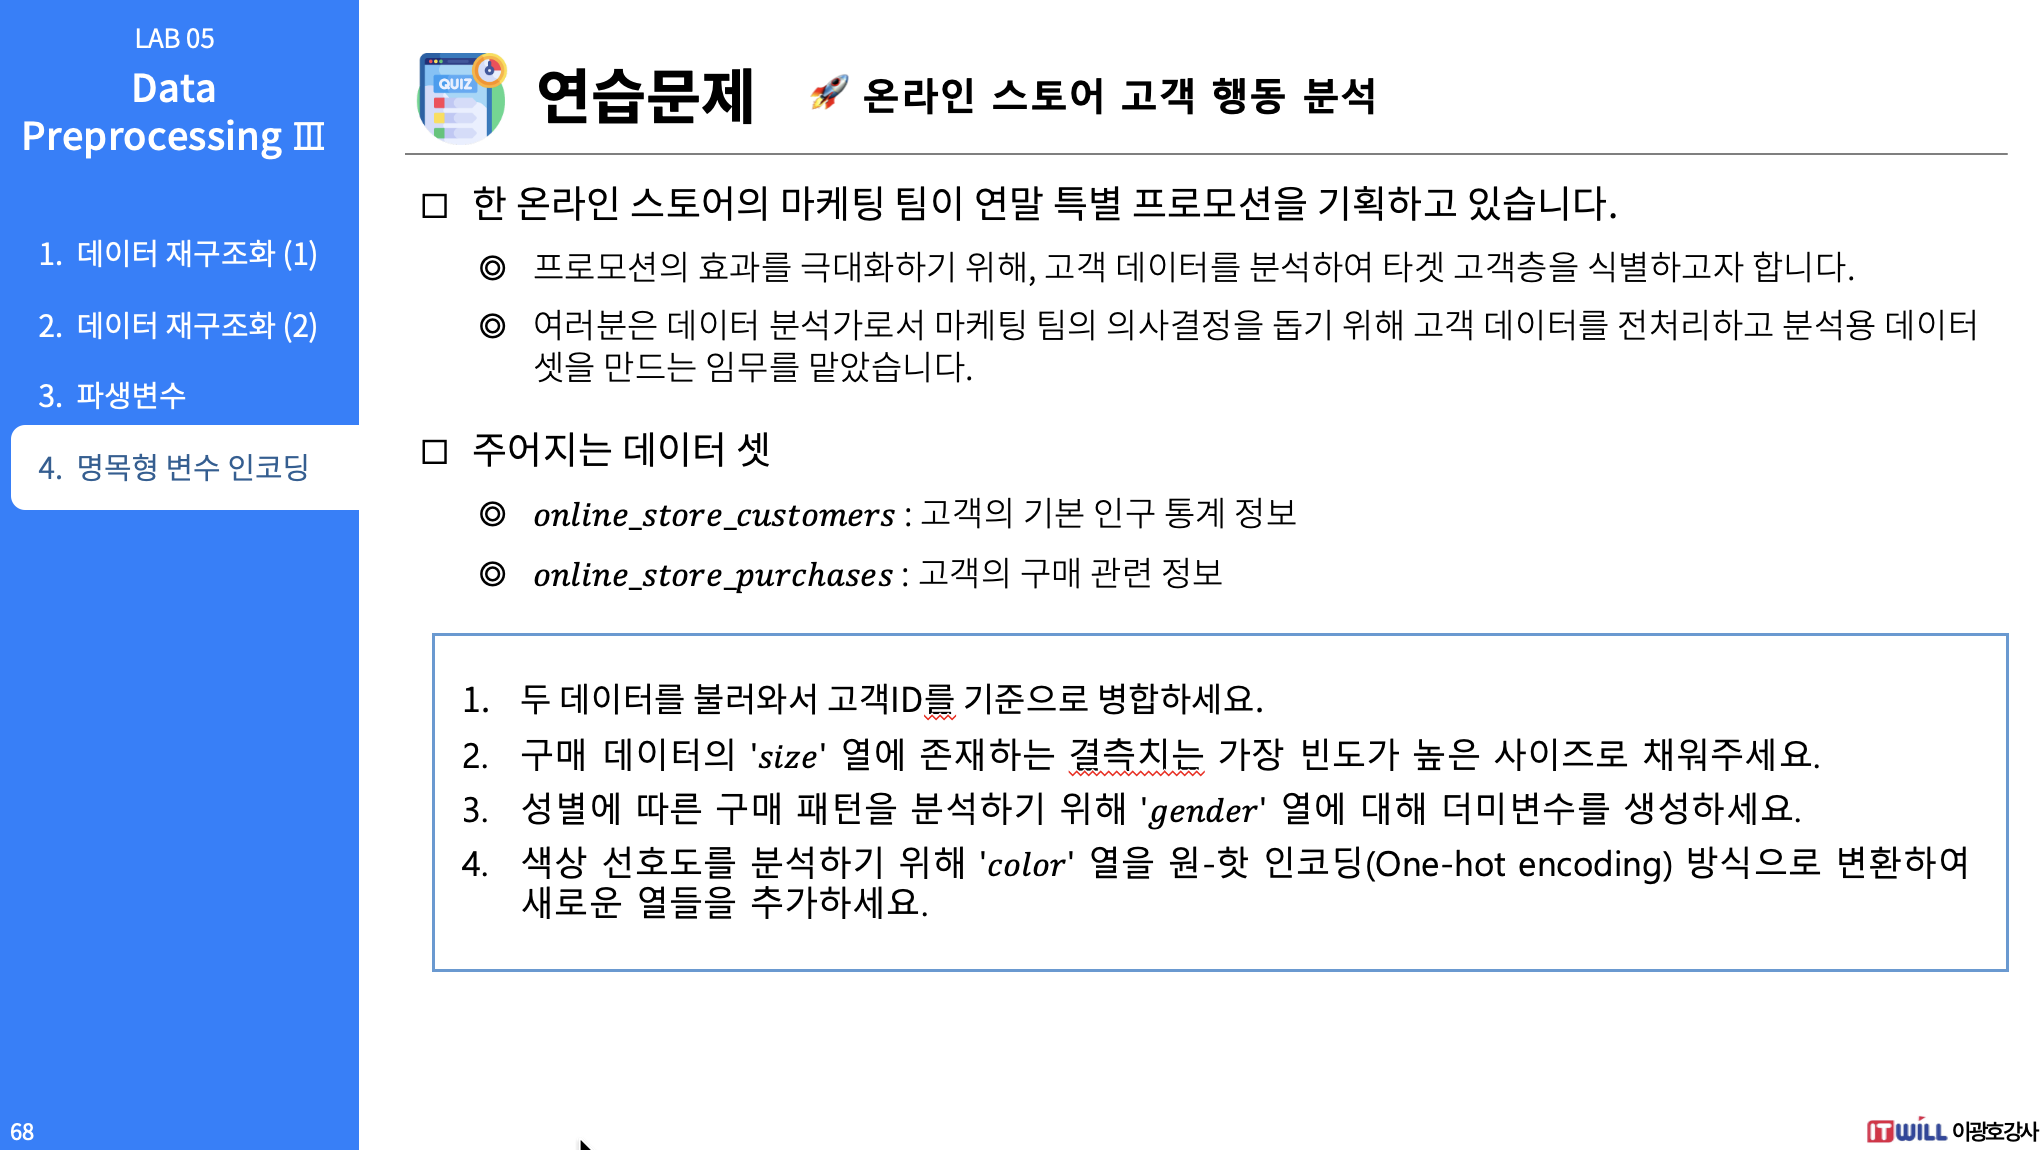

In [58]:
origin_customers = load_data("online_store_customers")
origin_customers

[data] https://data.hossam.kr/data/lab05/online_store_customers.xlsx
[desc] 한 온라인 스토어의 마케팅 팀이 연말 특별 프로모션을 기획에 필요한 고객의 기본 인구 통계 정보(메타데이터 없음)
[!] Cannot read metadata


,name,gender,age
user_id,,,
1,Alice,F,25
2,Bob,M,30
3,Charlie,M,35
4,David,M,42
5,Eve,F,28
6,Frank,M,21
7,Grace,F,33
8,Henry,M,45
9,Ivy,F,29


In [67]:
origin_purchases = load_data("online_store_purchases")
origin_purchases

[data] https://data.hossam.kr/data/lab05/online_store_purchases.xlsx
[desc] 한 온라인 스토어의 마케팅 팀이 연말 특별 프로모션을 기획에 필요한 고객의 구매 관련 정보(메타데이터 없음)
[!] Cannot read metadata


,user_id,product,size,color,price
purchase_id,,,,,
101,1,T-shirt,M,White,15000
102,2,Pants,L,Black,35000
103,1,Skirt,S,Red,25000
104,3,T-shirt,L,Blue,17000
105,5,Jacket,M,Black,55000
106,4,Pants,M,Khaki,33000
107,6,T-shirt,S,White,16000
108,7,Jacket,NaN,Red,58000
109,8,Pants,L,Black,38000


In [68]:
# merged_data = merge(origin_customers, origin_purchases, on = 'user_id', how='left')
merged_data = merge(origin_customers, origin_purchases, left_index=True, right_on='user_id')
merged_data


,name,gender,age,user_id,product,size,color,price
purchase_id,,,,,,,,
101,Alice,F,25,1,T-shirt,M,White,15000
103,Alice,F,25,1,Skirt,S,Red,25000
115,Alice,F,25,1,Pants,S,Blue,31000
102,Bob,M,30,2,Pants,L,Black,35000
113,Bob,M,30,2,Jacket,L,Navy,62000
104,Charlie,M,35,3,T-shirt,L,Blue,17000
106,David,M,42,4,Pants,M,Khaki,33000
105,Eve,F,28,5,Jacket,M,Black,55000
112,Eve,F,28,5,Pants,S,Khaki,32000


In [61]:
from sklearn.impute import SimpleImputer
import numpy as np
imr = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imr

,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [62]:
df_imr = imr.fit_transform(merged_data[['size']])
df_imr

array([['M'],
       ['S'],
       ['S'],
       ['L'],
       ['L'],
       ['L'],
       ['M'],
       ['M'],
       ['S'],
       ['S'],
       ['S'],
       ['M'],
       ['L'],
       ['S'],
       ['XL']], dtype=object)

In [65]:
merged_data[['size']]= df_imr
merged_data

,user_id,name,gender,age,product,size,color,price
0,1,Alice,F,25,T-shirt,M,White,15000
1,1,Alice,F,25,Skirt,S,Red,25000
2,1,Alice,F,25,Pants,S,Blue,31000
3,2,Bob,M,30,Pants,L,Black,35000
4,2,Bob,M,30,Jacket,L,Navy,62000
5,3,Charlie,M,35,T-shirt,L,Blue,17000
6,4,David,M,42,Pants,M,Khaki,33000
7,5,Eve,F,28,Jacket,M,Black,55000
8,5,Eve,F,28,Pants,S,Khaki,32000
9,6,Frank,M,21,T-shirt,S,White,16000


In [64]:
dummies_merged_data =get_dummies(merged_data, columns = ['gender'], dtype='int', drop_first=True)
dummies_merged_data

,user_id,name,age,product,size,color,price,gender_M
0,1,Alice,25,T-shirt,M,White,15000,0
1,1,Alice,25,Skirt,S,Red,25000,0
2,1,Alice,25,Pants,S,Blue,31000,0
3,2,Bob,30,Pants,L,Black,35000,1
4,2,Bob,30,Jacket,L,Navy,62000,1
5,3,Charlie,35,T-shirt,L,Blue,17000,1
6,4,David,42,Pants,M,Khaki,33000,1
7,5,Eve,28,Jacket,M,Black,55000,0
8,5,Eve,28,Pants,S,Khaki,32000,0
9,6,Frank,21,T-shirt,S,White,16000,1


In [69]:
df3 = get_dummies(dummies_merged_data, columns = ['color'], dtype='int', drop_first=True)
encoder = OneHotEncoder(sparse_output=False, drop='first')
result = encoder.fit_transform(merged_data[['color']])
result

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [70]:
encoder.get_feature_names_out(['color'])

array(['color_Blue', 'color_Khaki', 'color_Navy', 'color_Red',
       'color_White'], dtype=object)

In [71]:
new_cols = encoder.get_feature_names_out(['color'])
one_hot_df = DataFrame(result, columns=new_cols, index=merged_data.index)
one_hot_df.head()

,color_Blue,color_Khaki,color_Navy,color_Red,color_White
purchase_id,,,,,
101,0.0,0.0,0.0,0.0,1.0
103,0.0,0.0,0.0,1.0,0.0
115,1.0,0.0,0.0,0.0,0.0
102,0.0,0.0,0.0,0.0,0.0
113,0.0,0.0,1.0,0.0,0.0
